In [1]:
import sys
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-poster')
lines = ["-","--","-.",":", "o", "v", "d", "^", "<", ">", "1", "2", "3", "4", "s", "p", "*"]

In [4]:

# os.listdir("../scripts/refl/")
# csvlist = glob.glob('../scripts/refl/*_REFL0.0*RANGE20*.csv')
# csvlist = glob.glob('../gxx/neutrino-headon-avg/varyalpha-bahcall/*.csv')
csvlist = glob.glob('../gxx/neutrino-headon-evo/neutrino-headon_MU_4.000000_REFL0.200000*.csv')
csvlist

['../gxx/neutrino-headon-evo/neutrino-headon_MU_4.000000_REFL0.200000_ITER30000_STEPS1000_RANGE1.000000_TH_20_t2017-11-17-18-59-18.csv',
 '../gxx/neutrino-headon-evo/neutrino-headon_MU_4.000000_REFL0.200000_ITER30000_STEPS1000_RANGE1.000000_TH_20_t2017-11-17-19-40-7.csv']

In [5]:
def dataimp(path):
    
#     return np.genfromtxt("../scripts/refl/" + path, delimiter = ", ")
    return np.genfromtxt( path, delimiter = ", ")


In [6]:
datarr = []

for i in range(len(csvlist)):
    
    datarr.append( dataimp(csvlist[i]) )

print("Data Loaded")


Data Loaded


In [7]:
totlen = len(datarr[0])
length = int(len(datarr[0][0])/2)

x = datarr[0][0][:length+1]
tott = int( (totlen-1)/3 )


In [8]:
def plotdata(dataraw, style, id):
    
    datafull = dataraw
    datafull = np.delete(datafull,0, axis=0)
    data = datafull[::3]
    data = np.insert(data, 0 ,dataraw[0], axis=0)
    
    plt.plot(x, data[-1][:length+1]/2+0.5, lines[style]+"r", linewidth=2, markersize = 6, label='R='+id+' Forward')
    plt.plot(x, data[-1][length:2*length+1][::-1]/2+0.5, lines[style]+'k', linewidth=2, markersize = 6, label='R='+id+' Backward')

def logplotdata(dataraw, style, id):

    datafull = dataraw
    datafull = np.delete(datafull,0, axis=0)
    data = datafull[::3]
    data = np.insert(data, 0 ,dataraw[0], axis=0)
    
    plt.semilogy(x, data[-1][:length+1]/2+0.5, lines[style]+"r", linewidth=2, markersize = 6, label='R='+id+' Forward')
    plt.semilogy(x, data[-1][length:2*length+1][::-1]/2+0.5, lines[style]+'k', linewidth=2, markersize = 6, label='R='+id+' Forward')


In [9]:
s2thetav = 0.916515138991;
omegav = 1;

def ProbTh(x):
    
    return 1 - ( s2thetav**2 )* np.sin( omegav * x / 2 )**2

lengthth = 100;
xth = np.arange(0,20,10/lengthth)
# print(x)
ptheory = ProbTh(xth)

In [10]:
def implt(data, asratio, pltitle):
    plttemp = plt.imshow(data, cmap='viridis', interpolation='nearest', aspect=asratio, vmin=0, vmax =1.0, origin='lower')
    axtemp = plt.gca()
    axtemp.tick_params(right='on')
    plt.axvline(x=100, ymin=0, ymax = 1, linewidth=1, color='gray')
    plt.title(pltitle)
    plt.colorbar(plttemp)

## Plots

In [33]:
dz = -datarr[0][0][0] + datarr[0][0][1];
dt = 1;
z, t = np.mgrid[0:10+dz:dz, 0:tott:1]

bp = 1;
edp = -1; # 1000000
p0 = datarr[0][bp:edp:9]/2 + 0.5
p1 = datarr[1][bp:edp:3]/2 + 0.5
presidue = p1[:3000]-p0[:3000];
# p5 = datarr[5][bp:edp:3]/2 + 0.5


ar=1/20

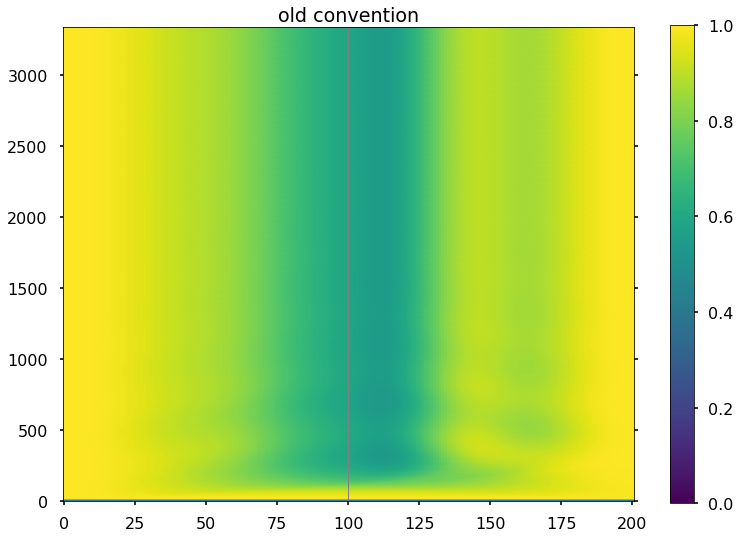

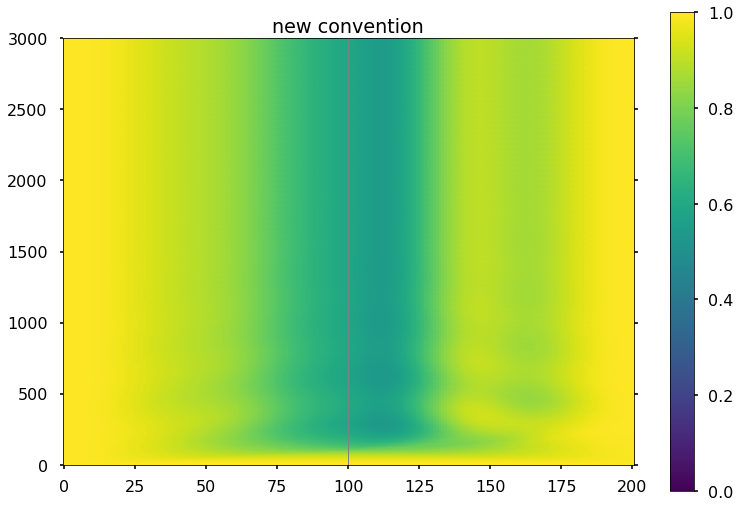

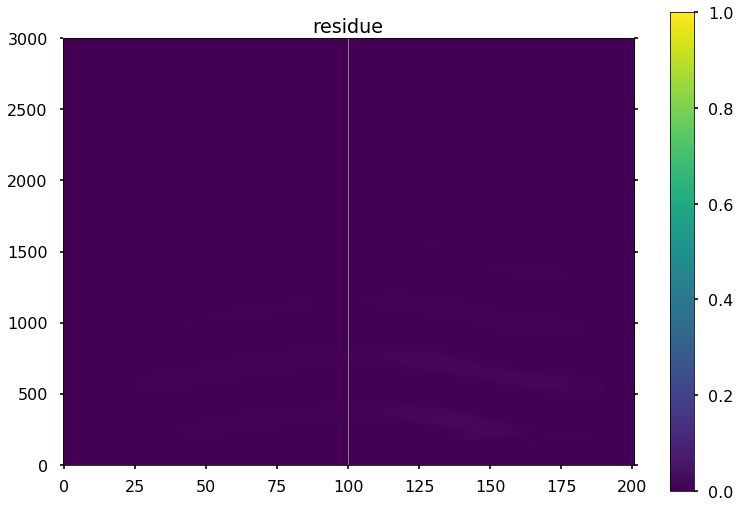

In [34]:
implt(p0,ar,'old convention')
plt.show()
implt(p1,ar,'new convention')
plt.show()
implt(presidue,ar,'residue')
plt.show()
# implt(p5,ar,'avg0.1')
# plt.show()

In [31]:
plt.plot(p0[100:,56],label='no damping')
plt.plot(p5[100:,56], label='damping')
# plt.plot(p0[::-1,150][100:1000])
plt.legend()
plt.show()

NameError: name 'p5' is not defined

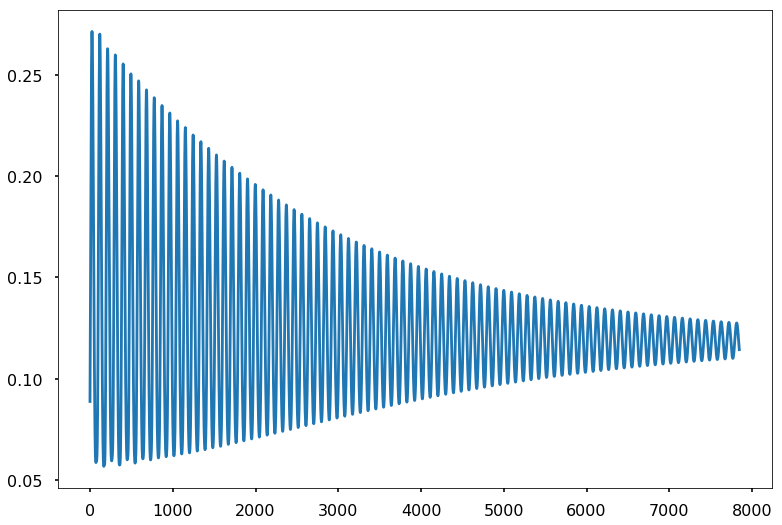

In [179]:
plt.plot(p0[1000:,150])
plt.show()